In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import functions as f
import json
import sys, importlib

In [2]:
df = pd.read_csv("../../../../data/CoMix_UK/merged_df_filter.csv")
print(df.columns, len(df))
df_1 = df[(df['sday_id'] >= "2020-07-30") & (df['sday_id'] < "2020-09-03")]
df_2 = df[(df['sday_id'] >= "2020-09-03") & (df['sday_id'] <= "2020-10-26")]
contacts1 = f.dataframe_to_contacts_vec(df_1)
contacts2 = f.dataframe_to_contacts_vec(df_2)
with open('../model_output_files/network_multi_1.json', 'r') as file:
    network_multi_1 = json.load(file)
with open('../model_output_files/network_multi_2.json', 'r') as file:
    network_multi_2 = json.load(file)
with open('../model_output_files/network_sbm_1.json', 'r') as file:
    network_sbm_1 = json.load(file)
with open('../model_output_files/network_sbm_2.json', 'r') as file:
    network_sbm_2 = json.load(file)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'part_id', 'hh_id', 'part_age',
       'part_gender', 'cont_id', 'cnt_age_exact', 'cnt_age_est_min',
       'cnt_age_est_max', 'cnt_gender', 'frequency_multi', 'phys_contact',
       'cnt_home', 'cnt_work', 'cnt_school', 'cnt_transport', 'cnt_leisure',
       'cnt_otherplace', 'duration_multi', 'X_x', 'sday_id', 'dayofweek',
       'day', 'month', 'year', 'wave', 'X_y', 'country', 'hh_size',
       'part_average_age', 'cnt_average_age', 'part_rand_age', 'cnt_rand_age'],
      dtype='object') 231497


## Log binning CoMix vs network model

In [8]:
A = 1.5
importlib.reload(sys.modules['functions'])
comix_x1, comix_y1 = f.log_bins(contacts=contacts1, A=A)
comix_x1[0] = 1/A
degrees_multi1 = np.array(network_multi_1['degree'])
model_x1, model_y1 = f.log_bins(contacts=degrees_multi1, A=A)
model_x1[0] = 1/A
degrees_sbm1 = np.array(network_sbm_1['degree'])
sbm_x1, sbm_y1 = f.log_bins(contacts=degrees_sbm1, A=A)
sbm_x1[0] = 1/A

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


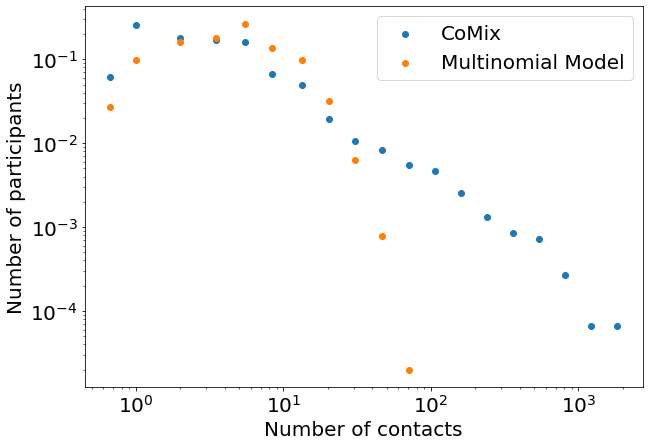

In [5]:
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(comix_x,comix_y, label = "CoMix")
ax.scatter(model_x, model_y, label = "Multinomial Model")
# ax.scatter(sbm_x, sbm_y, label = "SBM")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Number of participants")
ax.set_xlabel("Number of contacts")
ax.legend()
plt.show()

In [9]:
A = 1.5
importlib.reload(sys.modules['functions'])
comix_x2, comix_y2 = f.log_bins(contacts=contacts2, A=A)
comix_x2[0] = 1/A
degrees_multi2 = np.array(network_multi_2['degree'])
model_x2, model_y2 = f.log_bins(contacts=degrees_multi2, A=A)
model_x2[0] = 1/A
degrees_sbm2 = np.array(network_sbm_2['degree'])
sbm_x2, sbm_y2 = f.log_bins(contacts=degrees_sbm2, A=A)
sbm_x2[0] = 1/A

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


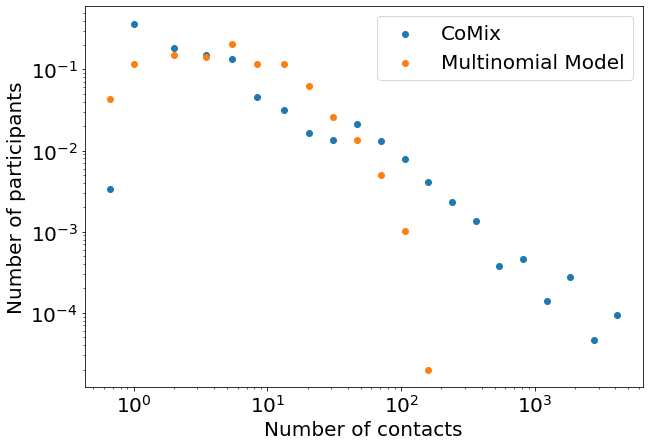

In [7]:
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(comix_x,comix_y, label = "CoMix")
ax.scatter(model_x, model_y, label = "Multinomial Model")
# ax.scatter(sbm_x, sbm_y, label = "SBM")
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Number of participants")
ax.set_xlabel("Number of contacts")
ax.legend()
plt.show()

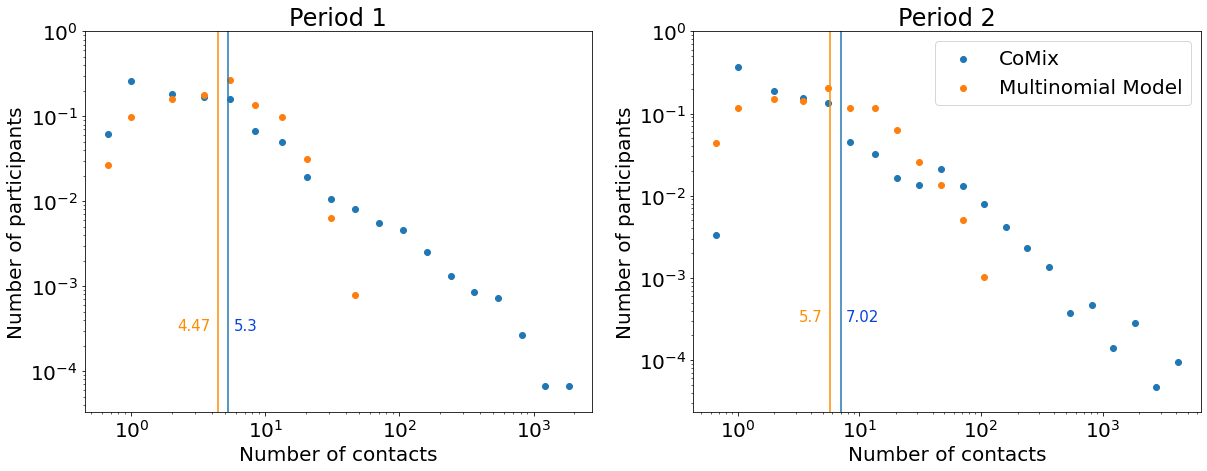

In [37]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
ax[0].scatter(comix_x1,comix_y1, label = "CoMix")
ax[0].scatter(model_x1, model_y1, label = "Multinomial Model")
ax[0].vlines(np.mean(contacts1), min(comix_y1)/2, 1)
ax[0].vlines(np.mean(degrees_multi1),min(comix_y1)/2, 1, colors=['darkorange'])
ax[0].text(5.8,3e-4,f'{round(np.mean(contacts1),2)}', fontdict={'fontsize': 15, 'color': 'xkcd:blue', 'alpha': 1})
ax[0].text(2.2,3e-4,f"{round(np.mean(degrees_multi1),2)}", fontdict={'fontsize': 15, 'color': 'darkorange', 'alpha': 1})
# ax[0].scatter(sbm_x, sbm_y, label = "SBM")
ax[0].set_ylim(min(comix_y1)/2,1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel("Number of participants")
ax[0].set_xlabel("Number of contacts")
ax[0].set_title("Period 1")

ax[1].scatter(comix_x2,comix_y2, label = "CoMix")
ax[1].scatter(model_x2, model_y2, label = "Multinomial Model")
ax[1].vlines(np.mean(contacts2), min(comix_y2)/2, 1)
ax[1].vlines(np.mean(degrees_multi2),min(comix_y2)/2, 1, colors=['darkorange'])
ax[1].text(7.7,3e-4,f'{round(np.mean(contacts2),2)}', fontdict={'fontsize': 15, 'color': 'xkcd:blue', 'alpha': 1})
ax[1].text(3.2,3e-4,f"{round(np.mean(degrees_multi2),2)}", fontdict={'fontsize': 15, 'color': 'darkorange', 'alpha': 1})
# ax[0].scatter(sbm_x, sbm_y, label = "SBM")
ax[1].set_ylim(min(comix_y2)/2,1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_ylabel("Number of participants")
ax[1].set_xlabel("Number of contacts")
ax[1].legend()
ax[1].set_title("Period 2")

plt.savefig("../../../../figures/important/3. stubbing/model3_vs_comix.png", bbox_inches="tight")
plt.show()

## Where are we missing stubs

In [2]:
missing2 = np.genfromtxt("../model_output_files/unconnected_stub_breakdown2.csv", delimiter=",")
missing2 = missing2/100
missing1 = np.genfromtxt("../model_output_files/unconnected_stub_breakdown1.csv", delimiter=",")
missing1 = missing1/100

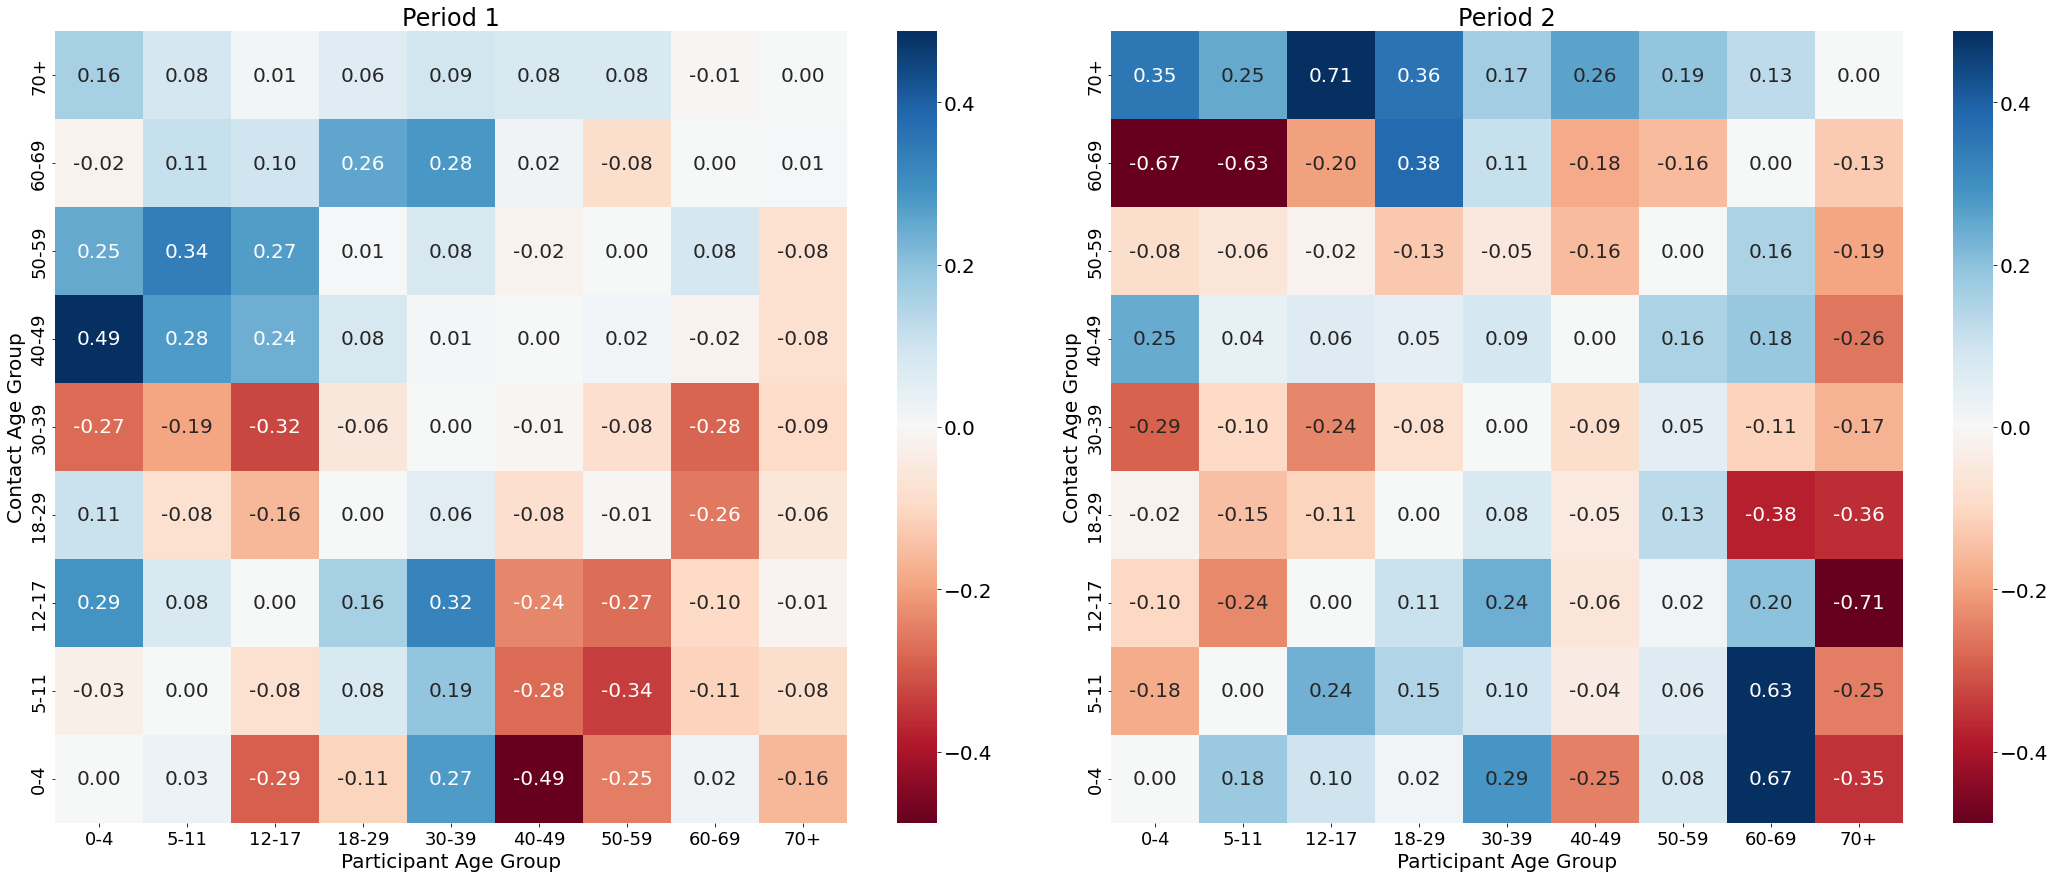

In [3]:
importlib.reload(sys.modules['functions'])
buckets = [5,12,18,30,40,50,60,70]
f.plot_age_mat2(missing1.transpose(), missing2.transpose(), buckets)